In [292]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

#### Đọc dữ liệu

In [293]:
df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [294]:
df.info()
# Các cột bị missing value đó là cột Description, CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [295]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [296]:
# kiểm tra các phần tử khuyết thiếu
df.isna().sum()
# Cột Description có 1454 dòng có giá trị khuyết thiếu
# Cột CustomerID có 135080 dòng có giá trị khuyết thiếu

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao

In [297]:
df_drop = df.dropna()

In [298]:
100*df_drop.shape[0]/df.shape[0]

75.0733056657114

In [299]:
# Ta sẽ xoá các dòng dữ liệu khuyết thiếu bởi vì ở cột CustomerID thì mỗi mã khách là duy nhất ta không thể fillna được
# Ta thấy dữ liệu sau khi drop thì còn lại 75% so với dữ liệu ban đầu

#### Thực hiện xử lý giá trị khuyết thiếu

In [300]:
df.drop( columns=('CustomerID'), inplace=True)

In [301]:
#  Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”
df['Description'] = df['Description'].fillna('Không biết')

In [302]:
df[df['Description'] == 'Không biết']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,Không biết,56,12/1/2010 11:52,0.0,United Kingdom
1970,536545,21134,Không biết,1,12/1/2010 14:32,0.0,United Kingdom
1971,536546,22145,Không biết,1,12/1/2010 14:33,0.0,United Kingdom
1972,536547,37509,Không biết,1,12/1/2010 14:33,0.0,United Kingdom
1987,536549,85226A,Không biết,1,12/1/2010 14:34,0.0,United Kingdom
...,...,...,...,...,...,...,...
535322,581199,84581,Không biết,-2,12/7/2011 18:26,0.0,United Kingdom
535326,581203,23406,Không biết,15,12/7/2011 18:31,0.0,United Kingdom
535332,581209,21620,Không biết,6,12/7/2011 18:35,0.0,United Kingdom
536981,581234,72817,Không biết,27,12/8/2011 10:33,0.0,United Kingdom


#### Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


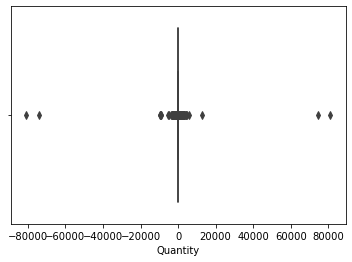

In [303]:
sns.boxplot(df['Quantity']);

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


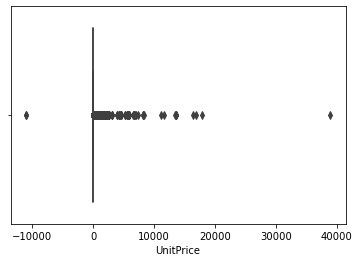

In [304]:
sns.boxplot(df['UnitPrice']);

In [305]:
# Nhận xét : Cần loại bỏ ở thuộc tính Quantity các giá trị <0, các giá trị của thuộc tính UnitPrice =0

#### Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch

In [306]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [307]:
df.shape

(530104, 7)

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


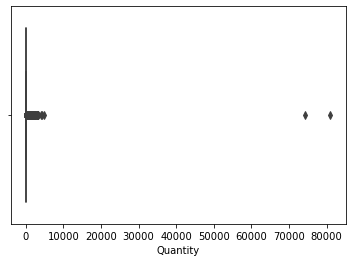

In [308]:
sns.boxplot(df['Quantity']);

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


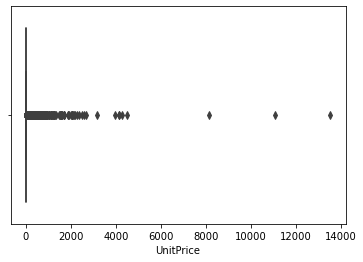

In [309]:
sns.boxplot(df['UnitPrice']);

In [310]:
# Sau khi loại bỏ các giá trị âm thì ta quan sát trên biểu đồ Boxplot
# Vẫn còn các điểm giá trị ngoại lai của thuộc tính Quantity và UnitPrice
# Ta sẽ sử dụng IQR để loại bỏ các giá trị ngoại lai
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Quantity     9.00
UnitPrice    2.88
dtype: float64

In [311]:
# Điểm ngoại lai sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
print((df[['Quantity','UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity','UnitPrice']] > (Q3 + 1.5 * IQR)))

        Quantity  UnitPrice
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
541904     False      False
541905     False      False
541906     False      False
541907     False      False
541908     False      False

[530104 rows x 2 columns]


In [312]:
df1 = df[~((df[['Quantity','UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity','UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [313]:
df1.shape

(436166, 7)

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


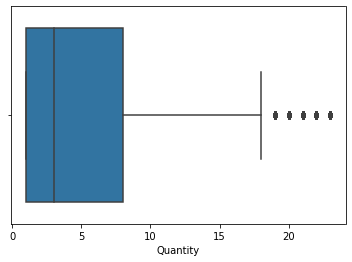

In [314]:
sns.boxplot(df1['Quantity']);

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


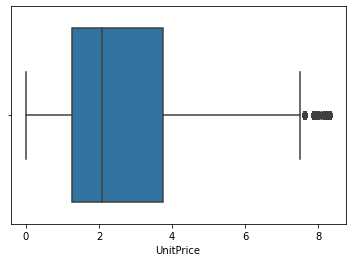

In [315]:
sns.boxplot(df1['UnitPrice']);

In [316]:
# Sau khi loại bỏ các giá trị ngoại lai ta quan sát lại biểu đồ Boxplot ta vẫn còn thấy các giá trị ngoại lai 
# Ta lại tiếp tục dùng IQR thêm lần nữa để loại bỏ các giá trị ngoại lai
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
IQR

Quantity     7.0
UnitPrice    2.5
dtype: float64

In [317]:
# Điểm ngoại lai sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
print((df1[['Quantity','UnitPrice']] < (Q1 - 1.5 * IQR)) | (df1[['Quantity','UnitPrice']] > (Q3 + 1.5 * IQR)))

        Quantity  UnitPrice
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
541904     False      False
541905     False      False
541906     False      False
541907     False      False
541908     False      False

[436166 rows x 2 columns]


In [318]:
df1 = df1[~((df1[['Quantity','UnitPrice']] < (Q1 - 1.5 * IQR)) | (df1[['Quantity','UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [321]:
df1.shape

(413535, 7)

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


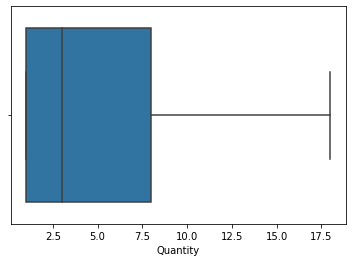

In [319]:
sns.boxplot(df1['Quantity']);

d:\Anaconda\Anaconda_Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


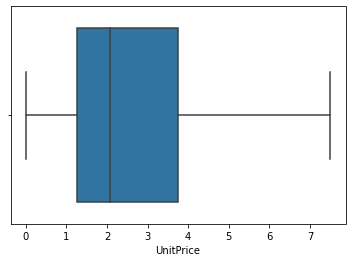

In [320]:
sns.boxplot(df1['UnitPrice']);

#### Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [322]:
df1.describe()

,Quantity,UnitPrice
count,413535.000000,413535.000000
mean,4.842729,2.489855
std,4.223383,1.624428
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,8.000000,3.750000
max,18.000000,7.500000


In [ ]:
### Nhận xét : Nhìn vào biểu đồ boxplot ta có thể thấy tập dữ liệu có phân phối lệch trái nhiều hơn